In [290]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [291]:
# Question 1

In [292]:
# Reads the data file into python
yrbs = pd.read_csv('yrbsdata.csv')
yrbs.head(5)

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,KY,Kentucky (KY),State,2,2007,9,51.6402,28,2,648526,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,KY,Kentucky (KY),State,2,2007,9,104.2187,18,2,648527,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,KY,Kentucky (KY),State,2,2007,9,33.2209,6,2,648528,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,KY,Kentucky (KY),State,2,2007,9,29.7973,29,2,648529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KY,Kentucky (KY),State,2,2007,9,29.8429,8,1,648530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
# Q1:A
# Searches for nulls in a row then sums the nulls in a row and the second sum adds the rows together
rowsum = yrbs.isnull().sum()
totalsum = rowsum.sum()
print(totalsum)
suminmil = (totalsum/1000000)
print(suminmil)

71655308
71.655308


In [294]:
# The code first searches for null values.
# It then groups the values by year.
# Next it sums the amount of null values for each category in the group.
# The last sum adds all of the columns together.

In [295]:
# Q1:B
msyr = yrbs.isnull().groupby(yrbs.year).sum().sum(axis = 1)
msyr

year
1991    2269401
1993    4638353
1995    4034078
1997    4456627
1999    2656198
2001    3030495
2003    4422538
2005    5419843
2007    5501677
2009    6933165
2011    7188894
2013    6672082
2015    7846079
2017    6585878
dtype: int64

In [296]:
# mysr.plot is a line plot of the mysr dataframe created above. 
# xlabel changes the label of the xaxis to year. 
# ylabel changes the label of the y axis. 
# xtick changes the increments of the x axis. 
# The range function is used to show every year from 1991 to 2018. 
# The fig size allows you to set the dimension length starting with x and then y. 
# Rot was used to rotate the x axis increments making it easier to read.
# Figure size was changed from 8,5 to 10,5 to make it easier to read the x axis increments.

<AxesSubplot:xlabel='year', ylabel='Missing Values in Millions'>

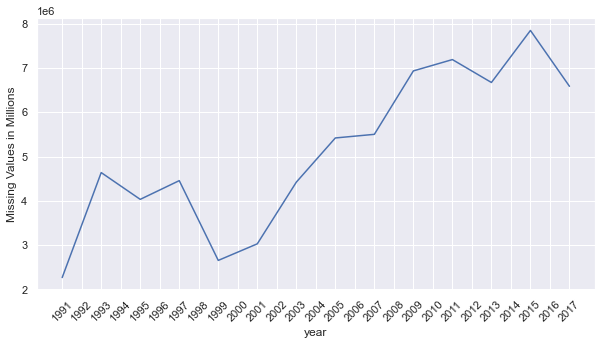

In [297]:
# Q1:C
msyr.plot(xlabel = 'year', ylabel = "Missing Values in Millions", xticks = range(1991,2018), figsize = (10,5), rot = 45)

In [298]:
# Past the year 1999 there is a constant upward trend in the missing values. 
# This means that less and less people are filling out the survey or parts of the survey
# In 2015 were it appears to start treading downward meaning that more people are filling out the information on the survey.

In [299]:
# Q1:D:i
yrbs['Missing_Values'] = yrbs.isnull().sum(axis = 1) > 75
yrbs['Missing_Values'].value_counts()


False    594417
True     368508
Name: Missing_Values, dtype: int64

In [ ]:
# The code groups the data by year then state. It counts the amount of missing values and sums the total.
# PartD[Proportion] calculates the proportion of missing answers.

In [300]:
# Q1:D:ii
PartD = yrbs.groupby(['year','sitename']).Missing_Values.agg(['count', 'sum'])
PartD['Proportion'] = PartD['sum']/PartD['count']
PartD

count   sum  Proportion
year sitename                                    
1991 Alabama (AL)          2477  2477    1.000000
     Idaho (ID)            4212  4212    1.000000
     Nebraska (NE)         2455  2455    1.000000
     South Carolina (SC)   5815  5815    1.000000
     South Dakota (SD)     1376  1376    1.000000
...                         ...   ...         ...
2017 Tennessee (TN)        2043    79    0.038669
     Utah (UT)             1848    68    0.036797
     Virginia (VA)         3697   278    0.075196
     West Virginia (WV)    1563    35    0.022393
     Wisconsin (WI)        2067    66    0.031930

[350 rows x 3 columns]

In [ ]:
# This code adds the year to the index

In [301]:
# Q1:D:iii
PartD.reset_index(inplace = True)
PartD

,year,sitename,count,sum,Proportion
0,1991,Alabama (AL),2477,2477,1.000000
1,1991,Idaho (ID),4212,4212,1.000000
2,1991,Nebraska (NE),2455,2455,1.000000
3,1991,South Carolina (SC),5815,5815,1.000000
4,1991,South Dakota (SD),1376,1376,1.000000
...,...,...,...,...,...
345,2017,Tennessee (TN),2043,79,0.038669
346,2017,Utah (UT),1848,68,0.036797
347,2017,Virginia (VA),3697,278,0.075196
348,2017,West Virginia (WV),1563,35,0.022393


In [ ]:
# The code changes the name of the columns
# .pop deletes the sum column

In [302]:
# Q1:D:iv
PartD.rename(columns={'year':'Survey year', 'sitename':'State', 'count':'Total number of respondents', 'Proportion':'Proportion of respondents with missing responses for more than 75 questions'}, inplace = True)
PartD.pop('sum')
PartD

,Survey year,State,Total number of respondents,Proportion of respondents with missing responses for more than 75 questions
0,1991,Alabama (AL),2477,1.000000
1,1991,Idaho (ID),4212,1.000000
2,1991,Nebraska (NE),2455,1.000000
3,1991,South Carolina (SC),5815,1.000000
4,1991,South Dakota (SD),1376,1.000000
...,...,...,...,...
345,2017,Tennessee (TN),2043,0.038669
346,2017,Utah (UT),1848,0.036797
347,2017,Virginia (VA),3697,0.075196
348,2017,West Virginia (WV),1563,0.022393


In [ ]:
# The code below sorts by survey year then the proportion in decending order.

In [303]:
# Q1:D:v
PartD.sort_values(by = ['Survey year', 'Proportion of respondents with missing responses for more than 75 questions'], ascending = False)

,Survey year,State,Total number of respondents,Proportion of respondents with missing responses for more than 75 questions
338,2017,New York (NY),11411,0.406362
321,2017,Colorado (CO),1493,0.403885
331,2017,Maine (ME),9501,0.150510
333,2017,Missouri (MO),1864,0.123927
330,2017,Louisiana (LA),1273,0.116261
...,...,...,...,...
1,1991,Idaho (ID),4212,1.000000
2,1991,Nebraska (NE),2455,1.000000
3,1991,South Carolina (SC),5815,1.000000
4,1991,South Dakota (SD),1376,1.000000


In [ ]:
# Converts the data to a csv

In [304]:
# Q1:D:vi
PartD.to_csv

<bound method NDFrame.to_csv of      Survey year                State  Total number of respondents  \
0           1991         Alabama (AL)                         2477   
1           1991           Idaho (ID)                         4212   
2           1991        Nebraska (NE)                         2455   
3           1991  South Carolina (SC)                         5815   
4           1991    South Dakota (SD)                         1376   
..           ...                  ...                          ...   
345         2017       Tennessee (TN)                         2043   
346         2017            Utah (UT)                         1848   
347         2017        Virginia (VA)                         3697   
348         2017   West Virginia (WV)                         1563   
349         2017       Wisconsin (WI)                         2067   

     Proportion of respondents with missing responses for more than 75 questions  
0                                           

In [305]:
# Question 2

In [ ]:
# The bins create the percentage that the values would be sorted into
# Next it is the names of those bins
# This creates the weight_category and labels the bins

In [306]:
# Q2:A
weight = yrbs['bmipct']
bins = [0,5,85,95,100] # (0,30], (30,60], (60,100)))
bin_names = ['underweight', 'normal', 'overweight', 'obese']

yrbs['weight_category'] = pd.cut(weight,bins,labels=bin_names)
print(yrbs.weight_category.value_counts())
yrbs.head(5)

normal         514664
overweight     109779
obese           91183
underweight     21669
Name: weight_category, dtype: int64


,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender,Missing_Values,weight_category
0,KY,Kentucky (KY),State,2,2007,9,51.6402,28,2,648526,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,False,normal
1,KY,Kentucky (KY),State,2,2007,9,104.2187,18,2,648527,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,False,NaN
2,KY,Kentucky (KY),State,2,2007,9,33.2209,6,2,648528,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,True,normal
3,KY,Kentucky (KY),State,2,2007,9,29.7973,29,2,648529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,normal
4,KY,Kentucky (KY),State,2,2007,9,29.8429,8,1,648530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,overweight


In [ ]:
# Creates a proportion of weight category for each year.

In [307]:
# Q2:B
crosswc = pd.crosstab(index = yrbs.year, columns = yrbs.weight_category, normalize = 'index')
crosswc

weight_category,underweight,normal,overweight,obese
year,,,,
1999,0.031512,0.750828,0.125505,0.092155
2001,0.027647,0.740456,0.133190,0.098707
2003,0.026919,0.717603,0.143065,0.112412
2005,0.025576,0.710499,0.145688,0.118237
2007,0.026843,0.698488,0.152715,0.121954
2009,0.028120,0.705220,0.147912,0.118748
2011,0.029140,0.702002,0.147808,0.121050
2013,0.031669,0.696796,0.147947,0.123588
2015,0.031167,0.670359,0.157689,0.140786


In [ ]:
# Plots a line graph of the table above

<AxesSubplot:xlabel='year'>

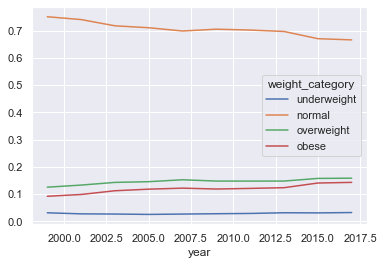

In [308]:
# Q2:C
crosswc.plot()
# As the years go on the more that normal weight decrease and overweight + obese increase yet underweight seems to be uneffected.

In [ ]:
# Creates a new category called Non_normal_weight
# Non_normal_weight is calculated by crosswc.underweight + crosswc.overweight + crosswc.obese
# > 0.3 checks to see which value is above 30%
# The last line shows the results where the Non_normal_weight percentage is above 0.3

In [309]:
# Q2:D
crosswc.columns = crosswc.columns.add_categories('Non_normal_Weight')
crosswc['Non_normal_Weight'] = crosswc.underweight + crosswc.overweight + crosswc.obese > 0.3
crosswc

crosswc[crosswc.Non_normal_Weight==True]

weight_category,underweight,normal,overweight,obese,Non_normal_Weight
year,,,,,
2007,0.026843,0.698488,0.152715,0.121954,True
2013,0.031669,0.696796,0.147947,0.123588,True
2015,0.031167,0.670359,0.157689,0.140786,True
2017,0.032463,0.665933,0.158521,0.143082,True


In [ ]:
# Renames the number values with the names of the categories

In [310]:
# Q2:E:i
q68 = yrbs["q68"].replace({1:'Very Underweight', 2:'Slightly Underweight', 3:'About the right weight', 4:'Slightly overweight', 5:'Very overweight'}, inplace = True)
q68


In [ ]:
# Creates a proportion distrubtions between weight_category and what the person thinks of their weight

In [311]:
# Q2:E:ii
crossq68 = pd.crosstab(index = yrbs.weight_category, columns = yrbs.q68, normalize = 'index')
crossq68

q68,About the right weight,Slightly Underweight,Slightly overweight,Very Underweight,Very overweight
weight_category,,,,,
underweight,0.290321,0.499468,0.030454,0.167273,0.012484
normal,0.665375,0.151928,0.146194,0.025615,0.010887
overweight,0.380565,0.024070,0.524954,0.017940,0.052471
obese,0.145530,0.023047,0.585158,0.027207,0.219058


In [ ]:
# Creates a bar graph of the table above

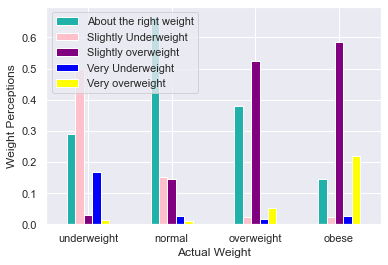

In [312]:
# Q2:E:iii
crossq68.plot.bar(rot=0, color=['lightseagreen','pink', 'purple', 'blue', 'yellow'])
plt.rcParams["figure.figsize"] = (10, 10)
plt.ylabel('Weight Perceptions')
plt.xlabel('Actual Weight')
plt.legend(loc=2);

In [313]:
# Q2:E:iv
# There is a high percentage of people that are overweight that preceive themselves as about the right weight.
# This could be due to the fact that BMI percentage is not the best measure of a healthy weight.

In [ ]:
# Changes sitecode to State Code
# Reads in the state_division csv
# Merges the two dataframes together from State Code to make one dataframe

In [314]:
# Q2:F

yrbs.rename(columns={'sitecode':'State Code'}, inplace = True)
yrbs
state = pd.read_csv('state_division.csv')
state
myrbs = pd.merge(yrbs, state, on='State Code', how='outer') 
myrbs

,State Code,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender,Missing_Values,weight_category,State,Region,Division
0,KY,Kentucky (KY),State,2.0,2007.0,9.0,51.6402,28.0,2.0,648526.0,...,NaN,1.0,NaN,NaN,NaN,False,normal,Kentucky,South,East South Central
1,KY,Kentucky (KY),State,2.0,2007.0,9.0,104.2187,18.0,2.0,648527.0,...,NaN,3.0,NaN,NaN,NaN,False,NaN,Kentucky,South,East South Central
2,KY,Kentucky (KY),State,2.0,2007.0,9.0,33.2209,6.0,2.0,648528.0,...,NaN,3.0,NaN,NaN,NaN,True,normal,Kentucky,South,East South Central
3,KY,Kentucky (KY),State,2.0,2007.0,9.0,29.7973,29.0,2.0,648529.0,...,NaN,NaN,NaN,NaN,NaN,True,normal,Kentucky,South,East South Central
4,KY,Kentucky (KY),State,2.0,2007.0,9.0,29.8429,8.0,1.0,648530.0,...,NaN,NaN,NaN,NaN,NaN,False,overweight,Kentucky,South,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962934,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ohio,Midwest,East North Central
962935,OR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oregon,West,Pacific
962936,TX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Texas,South,West South Central
962937,VT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vermont,Northeast,New England


In [ ]:
# Creates a bar chart showing the division compared to the weight category stacked on top of each other

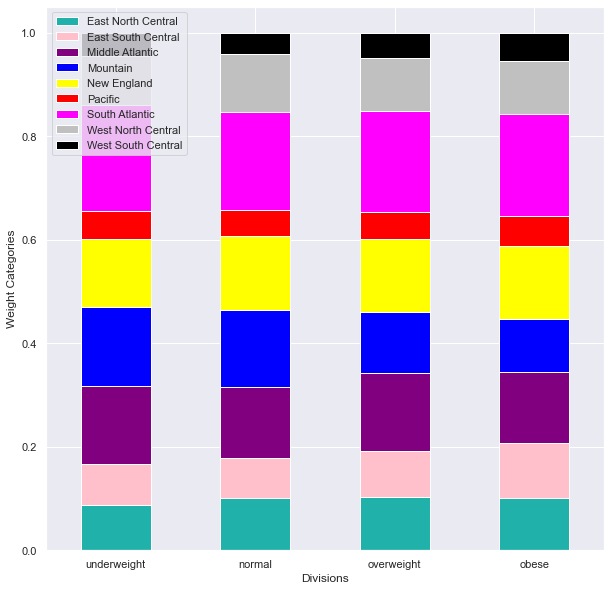

In [315]:
# Q2:G
PartF = pd.crosstab(index = myrbs.weight_category, columns = myrbs.Division, normalize = 'index')
PartF

PartF.plot.bar(stacked = True, rot=0, color=['lightseagreen','pink', 'purple', 'blue', 'yellow', 'red', 'fuchsia', 'silver', 'black'])
plt.rcParams["figure.figsize"] = (10, 20)
plt.ylabel('Weight Categories')
plt.xlabel('Divisions')
plt.legend(loc=2);

# People in the mountain region tend to be more in the underweight to normal category.
# The opposite can be said about the Middle Atlantic
# There were a lot of people in the South Atlantic region who participated in the survey

In [316]:
# Question 3

In [317]:
# Q3:A
q89 = yrbs["q89"].replace({1:'Mostly A\'s', 2:'Mostly B\'s',3:'Mostly C\'s',4:'Mostly D\'s',5:'Mostly F\'s', 6:'NaN', 7:'NaN'}, inplace = True)
q89

In [ ]:
# Creates a pie chart based off of the percentages of results 

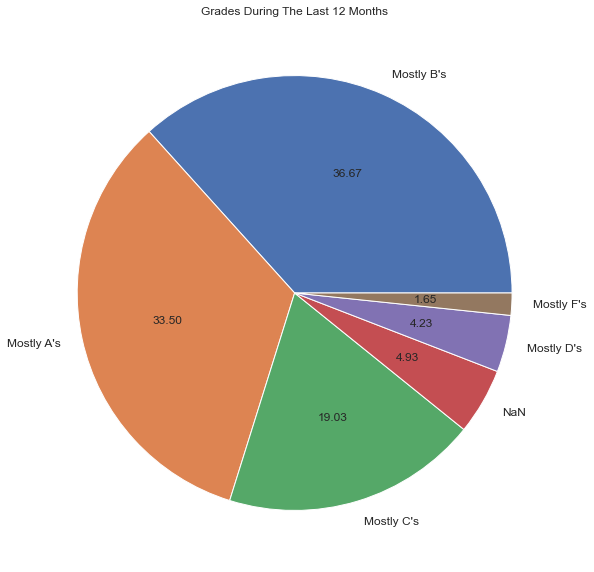

In [318]:
# Q3:B
yrbs.q89.value_counts().plot.pie(autopct='%.2f', fontsize=12, figsize=(10,10));
plt.title('Grades During The Last 12 Months')
plt.axis('off');

# The largest percentage of students are getting mostly B's followed closely behind by mostly A's.
# There is a significant dropoff after mostly B's with a decrease of 17.64% which is larger than the dropoff between mostly
# C's and mostly D's (14.8%)

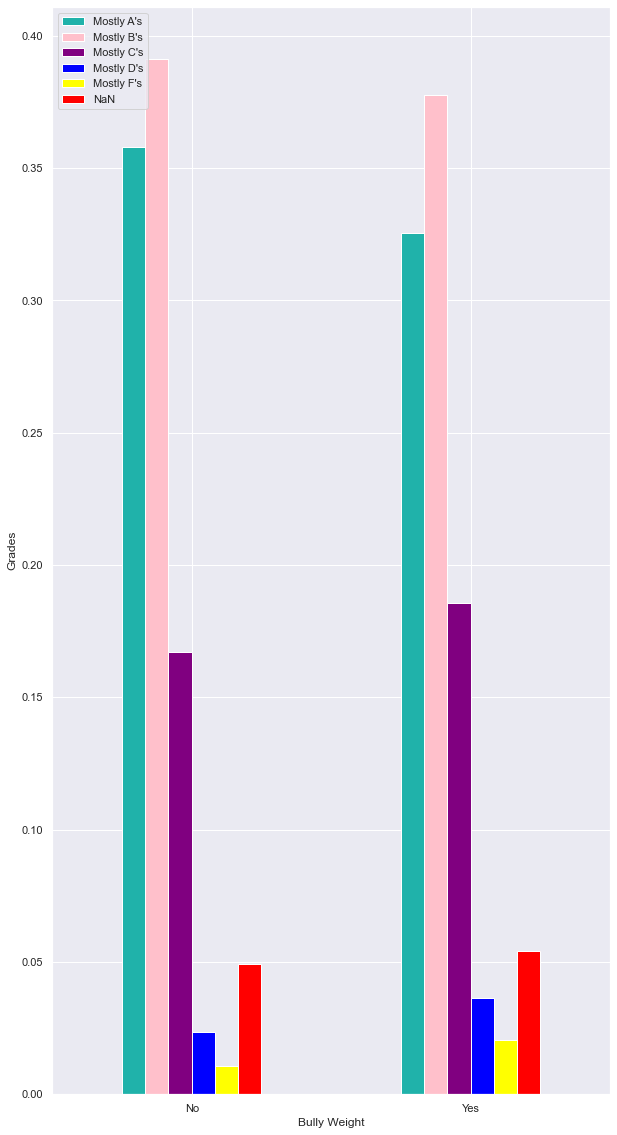

In [319]:
# Q3:C
qbw = yrbs["qbullyweight"].replace({1:'Yes', 2:'No'}, inplace = True)
qbw

crossq89 = pd.crosstab(index = yrbs.qbullyweight, columns = yrbs.q89, normalize = 'index')
crossq89

crossq89.plot.bar(rot=0, color=['lightseagreen','pink', 'purple', 'blue', 'yellow', 'red', 'fuchsia', 'silver', 'black'])
plt.rcParams["figure.figsize"] = (10, 10)
plt.ylabel('Grades')
plt.xlabel('Bully Weight')
plt.legend(loc=2);

In [320]:
# Students who are Bullied for their weight have an increase in grades that are lower than mostly C's and a decrease
# in mostly A's and B's

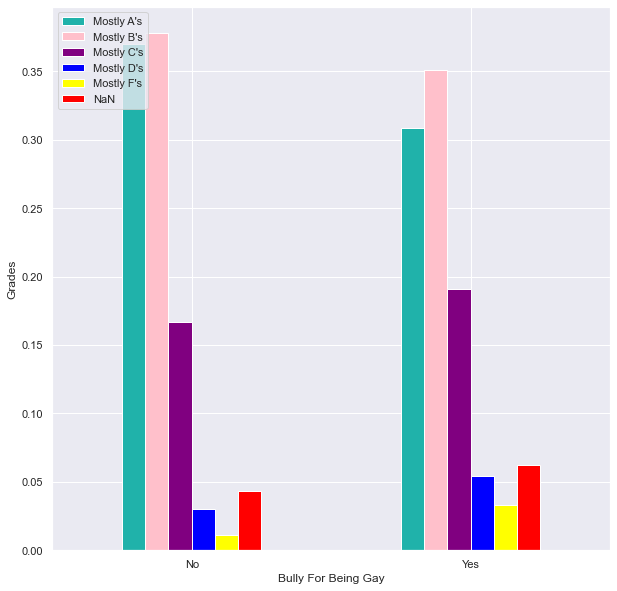

In [333]:
qbg = yrbs["qbullygay"].replace({1:'Yes', 2:'No'}, inplace = True)
qbg

crossq89 = pd.crosstab(index = yrbs.qbullygay, columns = yrbs.q89, normalize = 'index')
crossq89

crossq89.plot.bar(rot=0, color=['lightseagreen','pink', 'purple', 'blue', 'yellow', 'red', 'fuchsia', 'silver', 'black'])
plt.rcParams["figure.figsize"] = (10, 10)
plt.ylabel('Grades')
plt.xlabel('Bully For Being Gay')
plt.legend(loc=2);

In [322]:
# The results are very similar to that of the previous graphs.

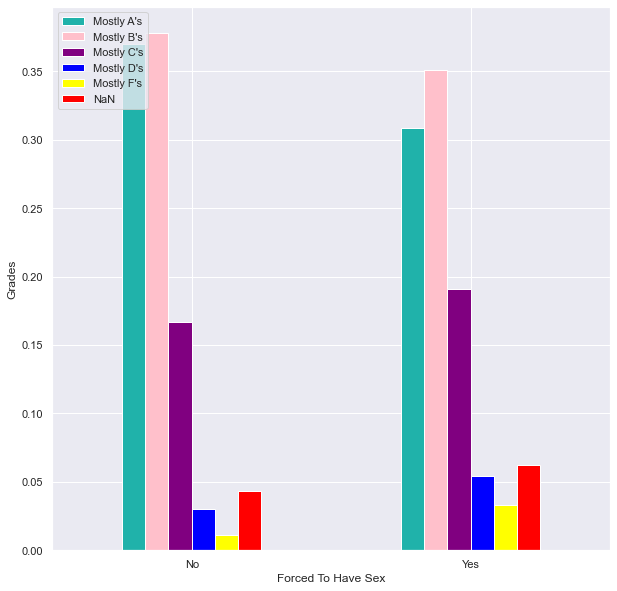

In [323]:
# Q3:D
q19 = yrbs["q19"].replace({1:'Yes', 2:'No'}, inplace = True)
q19

crossq19 = pd.crosstab(index = yrbs.q19, columns = yrbs.q89, normalize = 'index')
crossq19

crossq89.plot.bar(rot=0, color=['lightseagreen','pink', 'purple', 'blue', 'yellow', 'red', 'fuchsia', 'silver', 'black'])
plt.rcParams["figure.figsize"] = (10, 10)
plt.ylabel('Grades')
plt.xlabel('Forced To Have Sex')
plt.legend(loc=2);

In [324]:
# Very similar to the other results. If a student was forced to have sex then their grades will tend to be lower than
# that of those who were not forced to have sex.

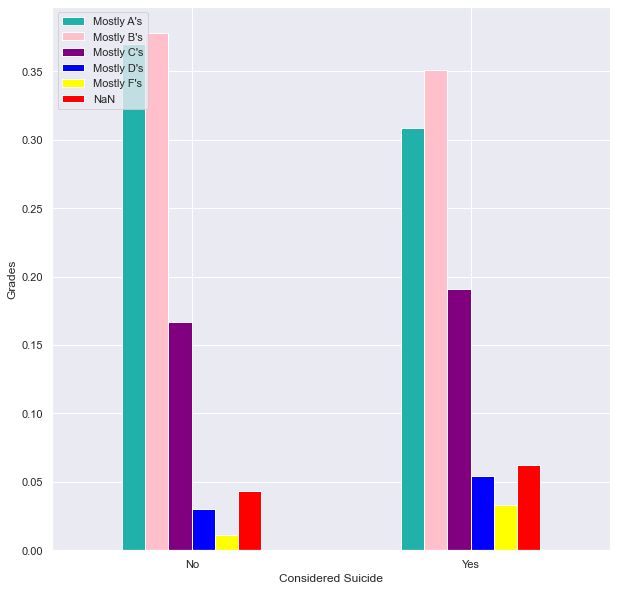

In [325]:
# Q3:D
q26 = yrbs["q26"].replace({1:'Yes', 2:'No'}, inplace = True)
q26

crossq26 = pd.crosstab(index = yrbs.q26, columns = yrbs.q89, normalize = 'index')
crossq26

crossq89.plot.bar(rot=0, color=['lightseagreen','pink', 'purple', 'blue', 'yellow', 'red', 'fuchsia', 'silver', 'black'])
plt.rcParams["figure.figsize"] = (10, 10)
plt.ylabel('Grades')
plt.xlabel('Considered Suicide')
plt.legend(loc=2);

In [326]:
# If the student has seriously cosidered contemplating suicide then they will tend to have lower grades.

In [ ]:
# Q4

In [ ]:
# Q4:A
# The goal of the graph above was to try and see if their was a relationship between the Age of a Person first time having
# sex and if they were taught sex ed.
# If someone is taught about sex education then are they less likely to have sex or more likely to have sex?

In [ ]:
# Q4:B
# Does having being taught sex education affect the rate of sex in different age groups?
# Is it more impactful to teach sex education earlier?
# Which age group is affected the most by sex education?

In [ ]:
# Renames categories
# Creates a cross tab proportion between the results
# Creates a line chart and then a bar chart.

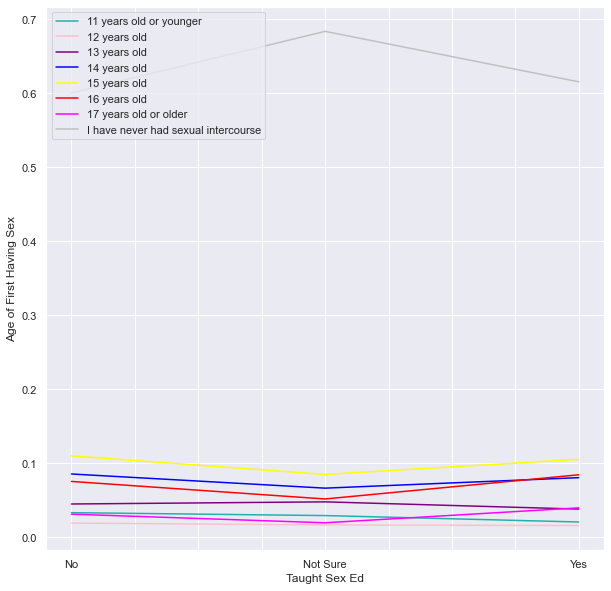

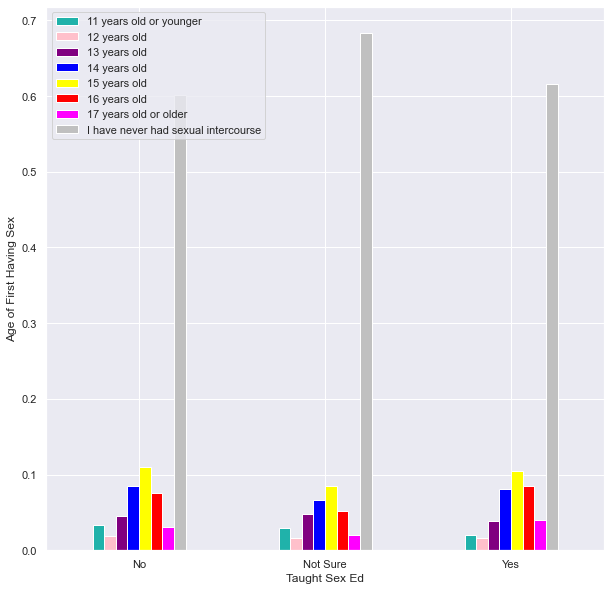

In [331]:
qts = yrbs["qtaughtsexed"].replace({1:'Yes', 2:'No', 3:'Not Sure'}, inplace = True)
qts

q60 = yrbs["q60"].replace({1:'I have never had sexual intercourse', 2:'11 years old or younger', 3:'12 years old', 4:'13 years old', 5:'14 years old', 6:'15 years old', 7:'16 years old', 8:'17 years old or older'}, inplace = True)
q60

crossq60 = pd.crosstab(index = yrbs.qtaughtsexed, columns = yrbs.q60, normalize = 'index')

crossq60.plot(rot=0, color=['lightseagreen','pink', 'purple', 'blue', 'yellow', 'red', 'fuchsia', 'silver', 'black'])
plt.rcParams["figure.figsize"] = (10, 10)
plt.ylabel('Age of First Having Sex')
plt.xlabel('Taught Sex Ed')
plt.legend(loc=2);

crossq60.plot.bar(rot=0, color=['lightseagreen','pink', 'purple', 'blue', 'yellow', 'red', 'fuchsia', 'silver', 'black'])
plt.rcParams["figure.figsize"] = (10, 10)
plt.ylabel('Age of First Having Sex')
plt.xlabel('Taught Sex Ed')
plt.legend(loc=2);

In [ ]:
# The findings shows that the never having sexual intercourse is slightly greater than those who have not had sex ed.
# Sex ed has decrease the rate of having sex in every category but 16 years old and 17 years old or older

In [332]:
crossq60

q60,11 years old or younger,12 years old,13 years old,14 years old,15 years old,16 years old,17 years old or older,I have never had sexual intercourse
qtaughtsexed,,,,,,,,
No,0.033188,0.019108,0.044921,0.085484,0.109956,0.075427,0.031177,0.600738
Not Sure,0.029268,0.016585,0.047805,0.066341,0.084878,0.051707,0.019512,0.683902
Yes,0.020581,0.015784,0.038034,0.080517,0.105270,0.084411,0.039702,0.615700
